In [1]:
import numpy as np

### Exponential family
$$
f(y\mid \theta, \phi, w) = \exp\left(\frac{y\theta - b(\theta)}{\phi/w} - c(y,\phi)\right)
$$

$$
\log f(y\mid \theta, \phi, w) = \frac{y\theta - b(\theta)}{\phi/w} - c(y,\phi)
$$

#### Gaussian

$$
\begin{aligned}
- \frac1{2\sigma^2}\left(y - \mu\right)^2 -\frac12\log(2\pi\sigma^2) 
= \frac{y\mu - \mu^2/2}{\sigma^2} - \frac12\left(\frac{y^2}{\sigma^2} + \log(2\pi\sigma^2)\right)
\end{aligned}
$$

Set:
$$
\begin{aligned}
\theta &= \mu\\
b(\theta)&= \frac{\theta^2}{2},\\
w &= 1,\\
\phi &= \sigma^2,\\
c(y,\phi) &= \frac12\left(\frac{y^2}{\phi} + \log(2\pi\phi)\right)
\end{aligned}
$$


#### Bernoulli

$$
y\log p + (1 - y)\log(1 - p) = y\operatorname{logit}(p) - (-\log(1 - p))
$$

Set:
$$
\begin{aligned}
\theta &= \operatorname{logit}p\\
b(\theta) &= \log(1 + e^{\theta}) = -\log(1 - p)\\
 \phi &= 1,\\
 w &= 1,\\
c(y, \phi) &= 0
\end{aligned}
$$

#### Poisson

$$
y\log\mu - \mu - \log y!
$$

Set:
$$
\begin{aligned}
\theta &= \log \mu,\\
b(\theta) &= e^\theta = \mu\\
\phi &= 1,\\
w &= 1,\\
c(y,\phi) &= \log y!
\end{aligned}
$$

#### Negative binomial

$$
c(y) + y\log (1 - p) + n\log p
$$

Set
$$
\begin{aligned}
\theta &= \log(1 - p) &\text{(note: $\theta < 0$)}\\
b(\theta) &= -n\log p = -n\log(1 - e^\theta)\\
\phi &= 1\\
w &= 1\\
c(y) &= -\log\binom{y + n - 1}{y}
\end{aligned}
$$

### Moments

If $y\sim f(y\mid \theta, \phi, w)$, then
$$
\begin{aligned}
\mathbb{E}[y] &= b'(\theta)\\
\mathbb{V}[y] &= \frac{\phi}{w}b''(\theta)
\end{aligned}
$$

Negative binomial:
$$
\sigma^2 = \mu + \frac1r\mu^2 = \phi\mu
$$

$$
\frac{\mu}r = \phi - 1
$$

$$
r = \frac{\mu}{\phi - 1}
$$

In [4]:
import numpy as np
import jax.numpy as jnp
import jax.scipy.stats as jstats
from matplotlib import pyplot as plt

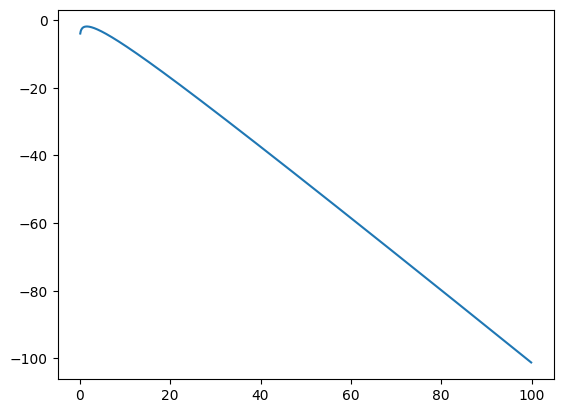

In [ ]:
size = 20
p = 1 / 3
n = 20
rng = np.random.default_rng(42)
y = jnp.array([1, 1, 2, 2, 2, 3, 3, 3, 3, 3])

ns = jnp.arange(0.1, 100, 0.1)
plt.plot(ns, jstats.nbinom.logpmf(y.reshape(-1, 1), ns.reshape(1, -1), p).mean(axis=0))